In [1]:
import pandas as pd
data=pd.read_csv("/content/games_ranking.csv")
print(data)

                                        game_name            genre rank_type  \
0                                Counter-Strike 2           Action     Sales   
1                Warhammer 40,000: Space Marine 2           Action     Sales   
2                                  Cyberpunk 2077           Action     Sales   
3                              Black Myth: Wukong           Action     Sales   
4                                      ELDEN RING           Action     Sales   
..                                            ...              ...       ...   
667                                      MXGP PRO  Sports & Racing    Review   
668  MXGP 2019 - The Official Motocross Videogame  Sports & Racing    Review   
669                                        Ride 2  Sports & Racing    Review   
670                                 Tanuki Sunset  Sports & Racing    Review   
671         Grand Mountain Adventure: Wonderlands  Sports & Racing    Review   

     rank  
0       1  
1       2  
2  

In [2]:
data.isna().sum()

game_name    0
genre        0
rank_type    0
rank         0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["game_name"]=b.fit_transform(data["game_name"])
data["genre"]=b.fit_transform(data["genre"])
data["rank_type"]=b.fit_transform(data["rank_type"])
data["rank"]=b.fit_transform(data["rank"])
print(data)

     game_name  genre  rank_type  rank
0           53      0          2     0
1          291      0          2     1
2           58      0          2     2
3           34      0          2     3
4           89      0          2     4
..         ...    ...        ...   ...
667        151      4          1    35
668        149      4          1    36
669        198      4          1    37
670        244      4          1    38
671        117      4          1    39

[672 rows x 4 columns]


In [5]:
x=data.drop("rank",axis=1)
y=data["rank"]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

     game_name  genre  rank_type
314        240      3          2
407          1      3          1
76          53      0          1
65          97      0          0
544        289      5          1
..         ...    ...        ...
336        200      3          2
562        169      4          2
430        187      3          1
344         55      3          2
618        146      4          0

[658 rows x 3 columns]
314     2
407    15
76      0
65     29
544    32
       ..
336    24
562    10
430    38
344    32
618    26
Name: rank, Length: 658, dtype: int64


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [8]:
c=model.predict([[465,2,1]])
print(c)

[20.76897872]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 672 artists>

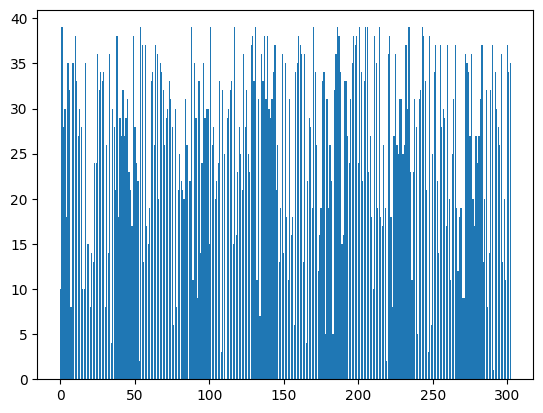

In [10]:
from matplotlib import pyplot  as plt
plt.bar(data["game_name"],data["rank"])